# Practical Exam: Hotel Operations

LuxurStay Hotels is a major, international chain of hotels. They offer hotels for both business and leisure travellers in major cities across the world. The chain prides themselves on the level of customer service that they offer.

However, the management has been receiving complaints about slow room service in some hotel branches. As these complaints are impacting the customer satisfaction rates, it has become a serious issue. Recent data shows that customer satisfaction has dropped from the 4.5 rating that they expect.

You are working with the Head of Operations to identify possible causes and hotel branches with the worst problems.

## Data

The following schema diagram shows the tables available. You have only been provided with data where customers provided a feedback rating.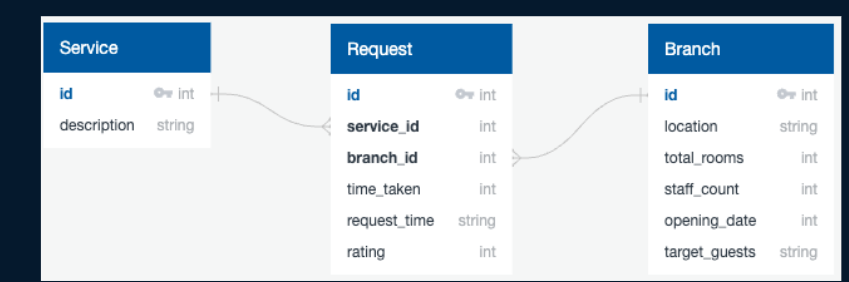

# Task 1

Before you can start any analysis, you need to confirm that the data is accurate and reflects what you expect to see.

It is known that there are some issues with the `branch` table, and the data team have provided the following data description.

Write a query to return data matching this description. You must match all column names and description criteria.

| Column Name | Criteria                                                |
|-------------|---------------------------------------------------------|
|id | Nominal. The unique identifier of the hotel. </br>Missing values are not possible due to the database structure.|
| location | Nominal. The location of the particular hotel. One of four possible values, 'EMEA', 'NA', 'LATAM' and 'APAC'. </br>Missing values should be replaced with “Unknown”. |
| total_rooms | Discrete. The total number of rooms in the hotel. Must be a positive integer between 1 and 400. </br>Missing values should be replaced with the default number of rooms, 100. |
| staff_count | Discrete. The number of staff employeed in the hotel service department. </br>Missing values should be replaced with the total_rooms multiplied by 1.5. |
| opening_date | Discrete. The year in which the hotel opened. This can be any value between 2000 and 2023. </br>Missing values should be replaced with 2023. |
| target_guests | Nominal. The primary type of guest that is expected to use the hotel. Can be one of 'Leisure' or 'Business'. </br>Missing values should be replaced with 'Leisure'. |

In [ ]:
-- Write your query for task 1 in this cell
select
	id,
	coalesce(location, 'Unknown') as location,
	coalesce(total_rooms, 100) as total_rooms,
	coalesce(staff_count, total_rooms*1.5) as staff_count,
	replace(opening_date,'-','2023')::numeric as opening_date,
	case
    	when target_guests like 'B%' then 'Business'
    	else coalesce(target_guests, 'Leisure')
	end as target_guests
from branch

,id,location,total_rooms,staff_count,opening_date,target_guests
0,1,LATAM,168,178,2017,Business
1,2,APAC,154,82,2010,Leisure
2,3,APAC,212,467,2003,Leisure
3,4,APAC,230,387,2023,Business
4,5,APAC,292,293,2002,Business
...,...,...,...,...,...,...
95,96,APAC,237,257,2000,Business
96,97,APAC,107,169,2005,Business
97,98,EMEA,196,126,2002,Leisure
98,99,APAC,242,251,2021,Business


# Task 2

The Head of Operations wants to know whether there is a difference in time taken to respond to a customer request in each hotel. They already know that different services take different lengths of time.

Calculate the average and maximum duration for each branch and service. Your output should include the columns `service_id`, `branch_id`, `avg_time_taken` and `max_time_taken`. Values should be rounded to two decimal places where appropriate.

In [ ]:
-- Write your query for task 2 in this cell
select
	service_id,
	branch_id,
	round(avg(time_taken), 2) as avg_time_taken,
	round(max(time_taken), 2) as max_time_taken
from request
group by service_id, branch_id


,service_id,branch_id,avg_time_taken,max_time_taken
0,2,46,13.09,16.0
1,4,99,9.13,13.0
2,1,8,2.56,10.0
3,2,13,13.53,17.0
4,1,46,2.08,4.0
...,...,...,...,...
380,4,73,9.43,13.0
381,4,88,9.36,12.0
382,1,89,2.77,7.0
383,4,31,9.00,9.0


# Task 3

The management team want to target improvements in `Meal` and `Laundry` service in Europe (`EMEA`) and Latin America (`LATAM`).

Write a query to return the `description` of the service, the `id` and `location` of the branch, the id of the request as `request_id` and the `rating` for the services and locations of interest to the management team.

Use the original branch table, not the output of task 1.

![image](image.png)


In [ ]:
-- Write your query for task 3 in this cell
select
	service.description,
	branch.id,
	branch.location,
	request.id as request_id,
	request.rating
from request
Inner join service
ON request.service_id = service.id
Inner join branch
ON request.branch_id = branch.id
where description in ('Meal','Laundry')
and location in ('EMEA','LATAM')

,description,id,location,request_id,rating
0,Laundry,63,EMEA,3,4
1,Laundry,69,LATAM,6,5
2,Meal,44,EMEA,18,4
3,Laundry,57,LATAM,19,3
4,Meal,1,LATAM,21,4
...,...,...,...,...,...
5042,Meal,30,EMEA,17662,4
5043,Meal,64,LATAM,17669,4
5044,Meal,51,LATAM,17674,5
5045,Meal,23,EMEA,17681,5


# Task 4

So that you can take a more detailed look at the lowest performing hotels, you want to get service and branch information where the average rating for the branch and service combination is lower than 4.5 - the target set by management.  

Your query should return the `service_id` and `branch_id`, and the average rating (`avg_rating`), rounded to 2 decimal places.

In [ ]:
-- Write your query for task 4 in this cell
select
	service_id,
	branch_id,
	round(avg(rating),2) as avg_rating
from request
group by service_id, branch_id
Having round(avg(rating),2) < 4.5

,service_id,branch_id,avg_rating
0,2,46,3.78
1,4,99,3.83
2,1,8,3.64
3,1,46,3.81
4,3,15,4.00
...,...,...,...
210,3,8,3.38
211,1,64,3.59
212,4,93,3.72
213,4,88,3.60
